<div style="display: flex; justify-content: space-between; align-items: center; padding: 5px; border-bottom: 1px solid #ccc;">
    <div style="flex: 1;">
        <h2 style="margin: 0;">CS5002: Programming Principles and Practice</h2>
    </div>
    <div style="margin-right: 0;">
        <img src="../rsc/logo.png" alt="University Logo" style="max-height: 80px;">
    </div>
</div>

<div style="padding: 5px;">
    <div style="font-size: 16px; margin-bottom: 5px;">Practical P3: Data analysis and visualisation Python</div>
    <div style="font-size: 12px;">Student ID: 200013825</div>
</div>

### Introduction 
This project aims to modularly read, clean and analyze real-world csv data. Below is the introduction on all the modules and major functions that worked together to complete data analysis.

`data_mining.py`: This executable python 
script automates data cleaning process, I used 
```python
invalid_mask = ~data[column].isin(valid_set)
```
to collect a list of booleans, indicating whether each csv code is admissible. 

Based on the context of this dataset, it is more efficient to neglect the type of the data when checking consistency, and then convert all data into pandas' categorical type. 
``` python
data[column] = data[column].astype(str)
```
I have converted all column in the data as string to help the determination of admissible values, and checked for missing columns or values, so then if encountered with any missing value, the row will be dropped.

To decode the csv data and to give context to the later stages of data analysis, i incorprated the data mapping at the stage of data_mining, so that the **cleaned_data.csv** contains all the code derived from json, with all the data being cleaned. I achieved this step by creating a helper function called **map_data** which takes the data to map as well as the json that was loaded in the **clean_data** function, and use **.map()** to map the data based on json if the column name match wth the json dictionary keys. Below is the logic to map data
```python
for column in data_to_map.columns:
        if column in decode_helper:
            data_to_map[column] = data_to_map[column].map(decode_helper[column])
```

`data_analysis.py`: This module contains function **analyze_data** and compute all the required analysis, then store all output from different requirements as a big dictionaries of dictionaires. This makes the overall workflow modular and clean with minimal repetition. One drawback would be the fact that all the analysis is hard-coded in, and reusability is diminished from this specific feature.

There are in total of 12 required data analysis, in the **data_analysis.py**, i have set them as requirements 1-12, and used pandas to analyze. A few analysis will be illustrated below. 

1. To get the percentage of records for any column, i used:
```python
column_counts = data['col_name'].value_counts(normalize=True) * 100
# then append the result to the big collective dictionary
results['requirement n name'] = column_counts.round(2).to_dict()
```
2. To group two columns together, i used:
```python
results['requirement n name'] = (data.groupby(['col_1', 'col_2']).size().to_dict())
```
As shown above, i collect each reqired results and have stored them in one dictionary called results. This helps with further processing and storing, as dictionary can centralize calculated results, and it can store a diverse range of data types.

`data_visualization.py`: This module works on visualizing the data extracted from the results dictionary. I have also included the **dict_to_df** function to turn the extracted dictionary to dataframe, making the presentation more humanly readable. 

This function is made to process three different dictionary type: when it the dictionary key is a tuple, when it is a nested dictionary or when it is just simple key-value dictionary. 

1. To handle dictionary key that is a tuple, i first turned the dictionary to dataframe, then deconstructed the tuple as two separate dataframes. using the code below:
```python
# transform to df
df = pd.DataFrame.from_dict(dict_to_trans, orient='index', columns=[col_names[-1]])
# split the tuple keys to two and transform to df
df[col_names[:-1]] = pd.DataFrame(df['index'].tolist(), index=df.index)
```

2. to handle the nested dictionary, i used two for loops to access each key and value within the nested dictionaries:
```python
for first_key, first_dict in dict_to_trans.items():
            for second_key, value in first_dict.items():
                # separate the nested dictionaries
                rows.append([first_key,second_key,value])
        return pd.DataFrame(rows,columns=col_names)
```
`ipynb_to_html.py`: This module aims to convert the .ipynb notebook to html file, which then can be opened as https call. To produce high quality html, I have set up the template as classic, and because i have images in the .ipynb notebook, i added a setting to embed pictures to when it is converted to html. As shown below:
```python
html_report = subprocess.run(['jupyter','nbconvert', '--to', 'html', '--template', template, '--embed-images', notebook], check=True)
```
`interactive_charts.py`: This module attempts to use ipywidgets to print out interactive charts, where the **interaactive_plot** determines the logic of using bar or pie charts, the **get_widge** creates the widgets needed for the interactive charts, **update_filter_values** handles the logic of updating the selected filter in runtime. This has been attempted, but the fluent interactivity is still not achieved.

***
### Problem Encountered

##### __1. infinite commit loop__: 
When I was trying to set up hooks for git to automatically update the gitlog everytime after commit, i accidently created an infinite loop of git commit, below was what I have included in the post-commit* file in .git/hooks:

``` python
#!/bin/bash
git log --oneline  --graph  > gitlog.txt
git commit -m 'gitlog.txt is updated with the latest commit history'
```
and this created redundant git log histroy that are shown in the gitlog.txt

I fixed it by deleting the line to commit within post-commit, after i realized that adding commit within post-commit can trigger recursive calls.

##### __2. system path append__: 
When I was trying to append certain relavant path to the sys path in order for jupyter notebook to read the file, i added the file path to sys path. After I print sys.path to check, i saw multiple paths being appended in the system paths, in order to clean this, i imported `site` which is a package that can help clear all custom paths and only keep the default path. I then used 
```python
sys.path = list(site.getsitepackages()) + sys.path [:1]
```
to implement this strategy. 
After clearing the system path, i appended the relative path using sys.path.append, and successfully imported the modules from **code** folder. As shown below.
```python
sys.path.append('./code')
```
Certain compiled python file was created to help faster import, and such files were added to .gitignore to prevent unncessary commiting and pushing because **\__pycache__\** will be created everytime the imported modules are ran.

##### __4. html header editing__: 
When i was trying to create proffesional looking header using html, it worked perfectly in vscode like so:
***
![Image](../rsc/Jupyter_heading.png)
***
But when i viewed it in jupyter notebook via jupyter, it did not look that aligned as shown below: 
***
![Image](../rsc/Jupyter_heading_notgood.png)
***
Notably, when i converted the .ipynb notebook to html, it looked pretty organized: 
***
![Image](../rsc/html_notebook.png)
***
These discrepencies might due to the fact that i am only using html code within markdown, and the adaptiveness as well as the flexibility is limited, as different interpretor or service runner have different margins or layout interpretation. Due to time constraints, this could not be fully resolved, but future investigation is warranted.
***

### Project showcase

**First set up the neccessary dependencies for the project**

In [1]:
import sys
sys.path.append('../code')
from data_analysis import analyze_csv
from data_visualization import dict_to_df, get_bar, get_pie
from interactive_charts import get_widge

# results_dict is the dictionary that the analyze_data function returns
resutlts_dict = analyze_csv()

Data has been analyzed and a dictionary with 
 dict_keys(['total_record', 'data_types', 'value_counts', 'age_count', 'occupation_counts', 'health_percentages', 'ethnic_group_percentages', 'hours_worked_by_industry', 'occupation_by_social_grade', 'economically_active_by_age', 'economically_inactive_by_health', 'working_hours_for_students']) 
 columns have been created ans stored! 


### **Basic Requirement**
**1: the total number of records in the dataset**

In [2]:
resutlts_dict['total_record']

63388

**2: the type of each variable in the dataset**

In [3]:
Q2_dict = resutlts_dict['data_types']
results_df_2 = dict_to_df(Q2_dict, col_names= ['columns','type'])
results_df_2

,columns,type
0,record_number,int64
1,region,object
2,residence_type,object
3,family_composition,object
4,sex,object
5,age,object
6,marital_status,object
7,student,object
8,country_of_birth,object
9,health,object


**3: Value counts of the dataset except 'record_number' and 'region'**

In [4]:
Q3_dict = resutlts_dict['value_counts']
results_df_3 = dict_to_df(Q3_dict, col_names= ['column', 'codes', 'count'])
results_df_3

,column,codes,count
0,residence_type,Not resident in a Communal Establishment,62239
1,residence_type,Resident in a Communal Establishment,1149
2,family_composition,Married/same-sex civil partnership couple family,33337
3,family_composition,Not in a family,11716
4,family_composition,Lone parent family (female lead),7757
...,...,...,...
87,approximate_social_grade,C1,15607
88,approximate_social_grade,DE,14709
89,approximate_social_grade,People aged under 16 and people resident in co...,12090
90,approximate_social_grade,C2,11602


**4: bar chart for the number of records for each age group**

inspect the data structure first:

In [5]:
Q4_dict = resutlts_dict['age_count']
results_df_4 = dict_to_df(Q4_dict, col_names=['age', 'count'])
results_df_4


,age,count
0,0 to 15,10980
1,45 to 54,9336
2,35 to 44,8963
3,25 to 34,8056
4,55 to 64,7854
5,16 to 24,7541
6,65 to 74,5731
7,75 and over,4927


then make the bar chart

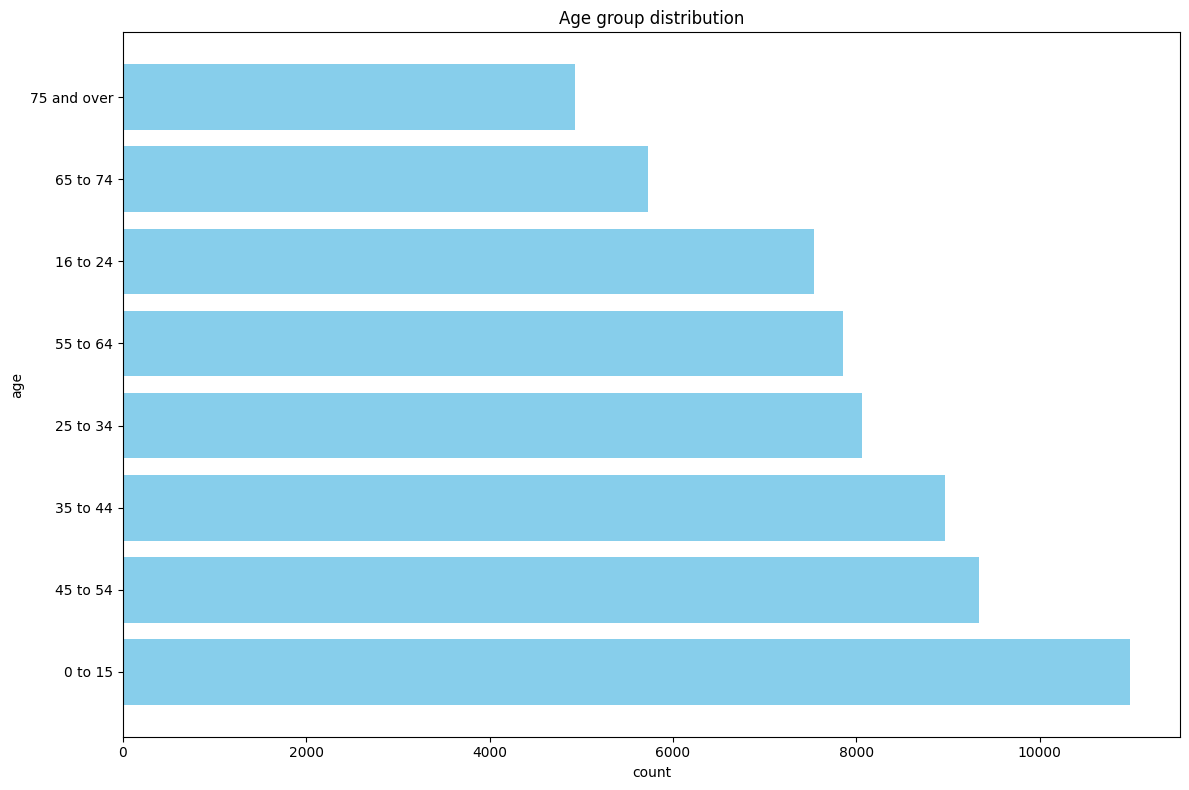

In [6]:
get_bar(results_df_4, x_col = 'age', y_col = 'count', title = 'Age group distribution', xlabel = 'count', ylabel = 'age')


**5: bar chart for the number of records for each occupation**

inspect the data structure to understand what to put in x and y axis

In [7]:
Q5_dict = resutlts_dict['occupation_counts']
results_df_5 = dict_to_df(Q5_dict, col_names= ['occupation', 'count'])
results_df_5

,occupation,count
0,People aged under 16 and people who have never...,14435
1,Elementary Occupations,7256
2,Professional Occupations,7237
3,Skilled Trades Occupations,6140
4,Administrative and Secretarial Occupations,6010
5,Associate Professional and Technical Occupations,5015
6,Sales and Customer Service Occupations,4934
7,"Caring, Leisure and Other Service Occupations",4484
8,"Process, Plant and Machine Operatives",4327
9,"Managers, Directors and Senior Officials",3550


import the function to make the graph

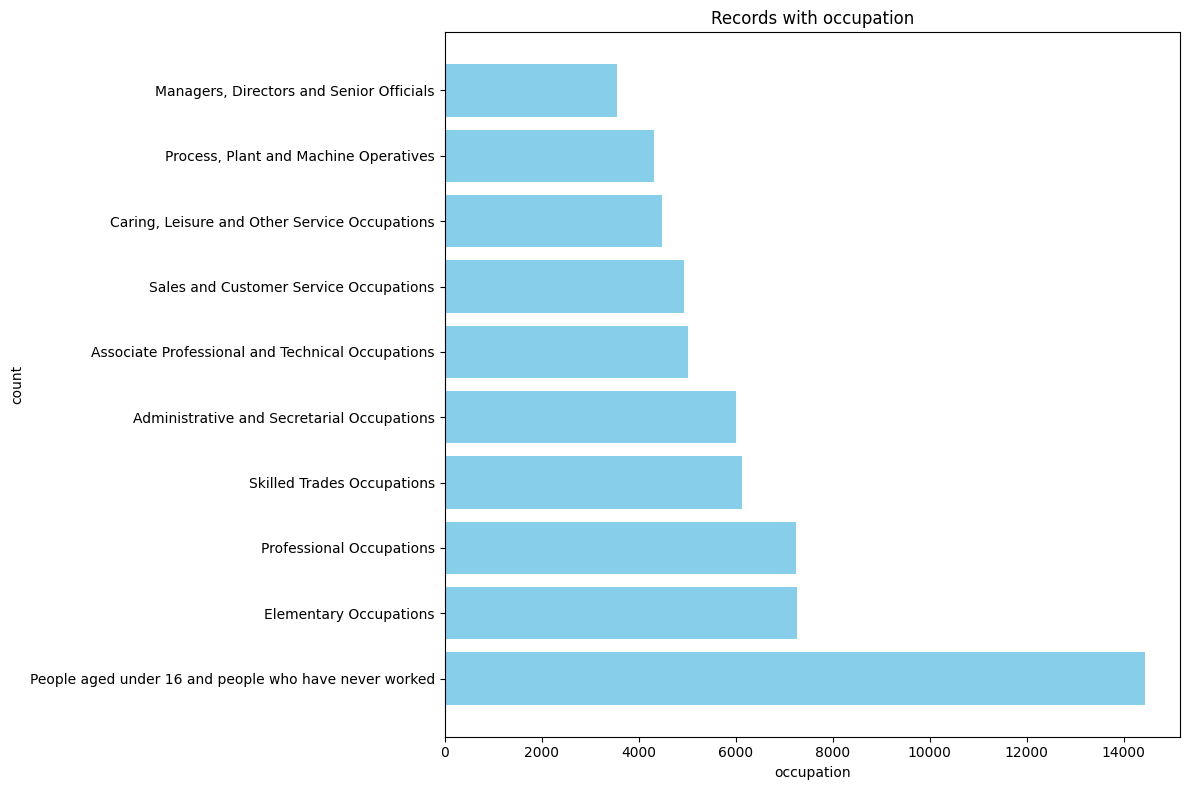

In [8]:
get_bar(results_df_5, x_col = 'occupation', y_col = 'count', title = 'Records with occupation', xlabel = 'occupation', ylabel = 'count')

### **Additional Requirements**

**6: pie chart for the percentage of records for each general health descriptor**

inspect the data first

In [9]:
Q6_dict = resutlts_dict['health_percentages']
resutlts_df_6 = dict_to_df(Q6_dict, col_names= ['health descriptor', 'percentage'])
resutlts_df_6

,health descriptor,percentage
0,Very good health,52.75
1,Good health,29.70
2,Fair health,11.90
3,Bad health,4.35
4,Very bad health,1.30


import the function to showcase the pie chart

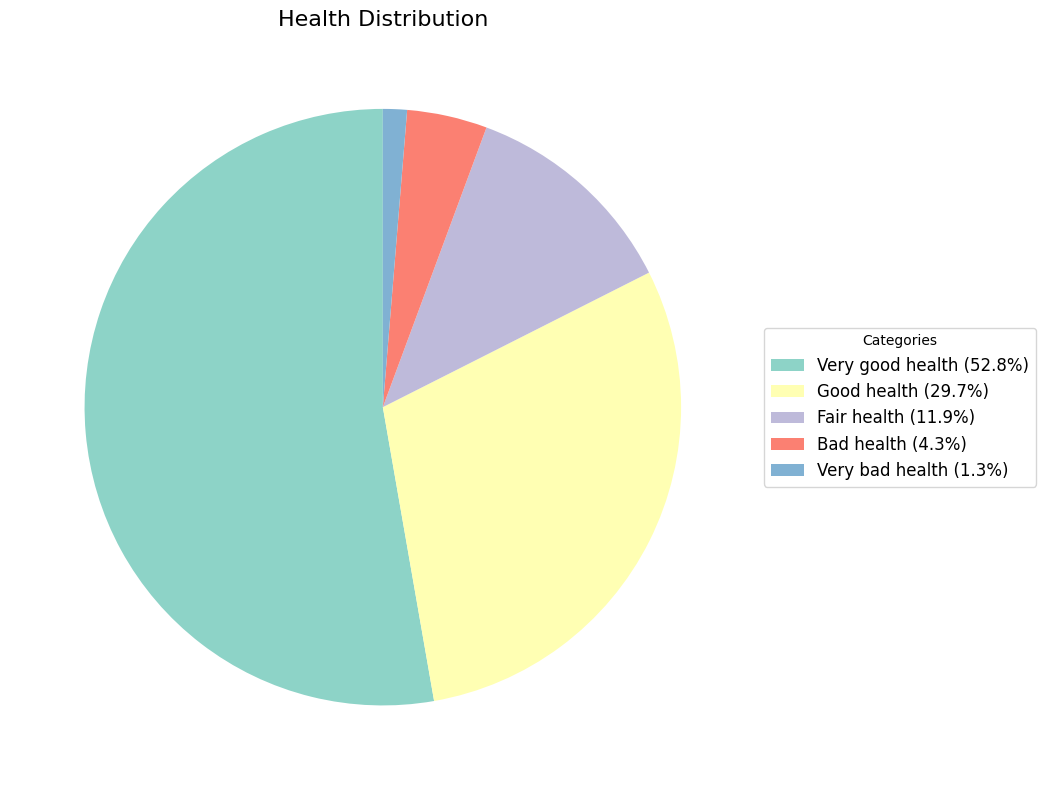

In [10]:
get_pie(resutlts_df_6, labels_col = 'health descriptor', values_col = 'percentage', title = 'Health Distribution')

**7: pie chart for the percentage of records for each ethnic group**

inspect the data structure

In [11]:
Q7_dict = resutlts_dict['ethnic_group_percentages']
resutlts_df_7 = dict_to_df(Q7_dict, col_names= ['ethinicity', 'percentage'])
resutlts_df_7

,ethinicity,percentage
0,White,96.08
1,Asian,2.63
2,African,0.59
3,Mixed or multiple ethnic group,0.31
4,Other ethnic group,0.26
5,Caribbean or black,0.13


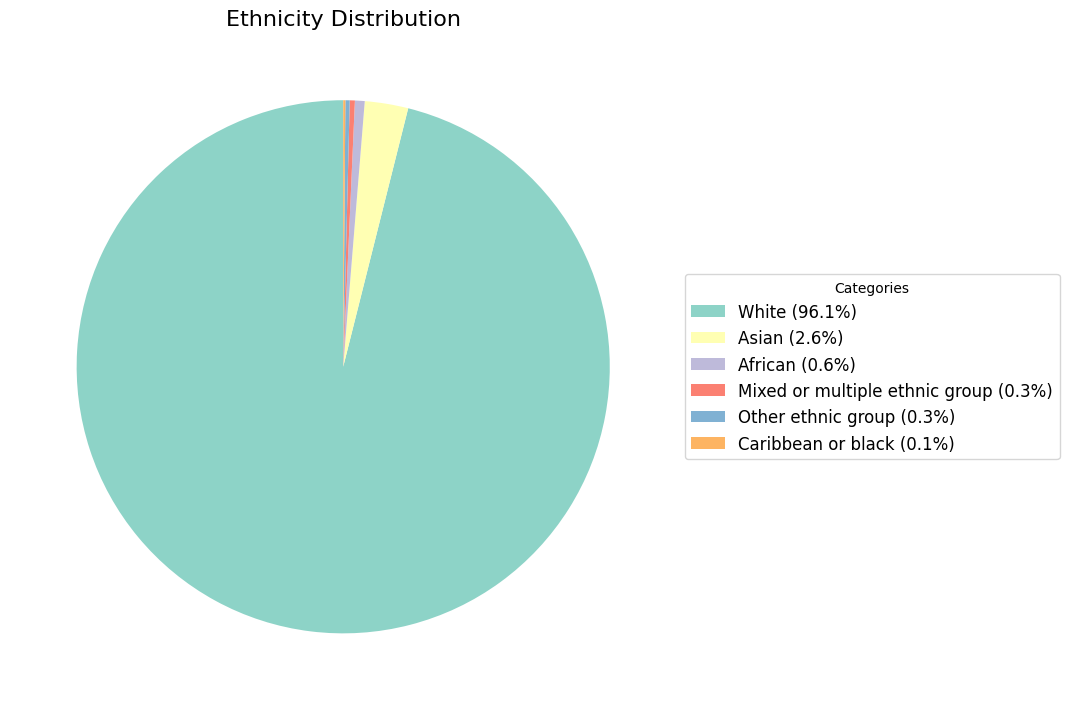

In [12]:
get_pie(resutlts_df_7, labels_col = 'ethinicity', values_col = 'percentage', title = 'Ethnicity Distribution')


**8: showcase the number of records by hours worked per week and industry**


In [13]:
Q8_dict = resutlts_dict['hours_worked_by_industry']
# transform the dictionary to dataframe for better readability
results_df_8 = dict_to_df(Q8_dict, col_names = ['hours_worked_per_week','industry','count'])
results_df_8

,hours_worked_per_week,industry,count
0,Full-time 49 or more hours worked,Accommodation and food service activities,230
1,Full-time 49 or more hours worked,"Agriculture, forestry and fishing",258
2,Full-time 49 or more hours worked,Arts; entertainment and recreation,57
3,Full-time 49 or more hours worked,Construction,427
4,Full-time 49 or more hours worked,Education,253
...,...,...,...
61,People aged under 16 and people not working,People aged under 16 and people who have never...,14435
62,People aged under 16 and people not working,Public administration and defence,1116
63,People aged under 16 and people not working,Real estate activities; Professional scientifi...,1588
64,People aged under 16 and people not working,Transport and storage; Information and communi...,1324


**9: showcasing the number of records by occupation and approximate social grade**

In [14]:
Q9_dict = resutlts_dict['occupation_by_social_grade']
#transform the dictionary to dataframe for better readability
results_df_9 = dict_to_df(Q9_dict, col_names = ['occupation','social grade','count'])
results_df_9


,occupation,social grade,count
0,Administrative and Secretarial Occupations,AB,707
1,Administrative and Secretarial Occupations,C1,3883
2,Administrative and Secretarial Occupations,C2,816
3,Administrative and Secretarial Occupations,DE,538
4,Administrative and Secretarial Occupations,People aged under 16 and people resident in co...,66
5,Associate Professional and Technical Occupations,AB,933
6,Associate Professional and Technical Occupations,C1,3336
7,Associate Professional and Technical Occupations,C2,377
8,Associate Professional and Technical Occupations,DE,280
9,Associate Professional and Technical Occupations,People aged under 16 and people resident in co...,89


**10: the number of economically active people depending on age**

In [15]:
Q10_dict = resutlts_dict['economically_active_by_age']
#transform the dictionary to dataframe for better readability
results_df_10 = dict_to_df(Q10_dict, col_names = ['economically_active_people_by_age','count'])
results_df_10

,economically_active_people_by_age,count
0,16 to 24,4859
1,25 to 34,6878
2,35 to 44,7639
3,45 to 54,7868
4,55 to 64,4745
5,65 to 74,784
6,75 and over,126


**11: the number of economically inactive people depending on a health descriptor**

In [16]:
Q11_dict = resutlts_dict['economically_inactive_by_health']
#transform the dictionary to dataframe for better readability
results_df_11 = dict_to_df(Q11_dict, col_names = ['economically_inactive_people_by_health','count'])
results_df_11

,economically_inactive_people_by_health,count
0,Bad health,2344
1,Fair health,4952
2,Good health,6172
3,Very bad health,738
4,Very good health,5303


**12: the number of working hours per week for students (4,6)**

In [17]:
Q12_dict = resutlts_dict['working_hours_for_students']
#transform the dictionary to dataframe for better readability
results_df_12 = dict_to_df(Q12_dict, col_names = ['students_working_type','Working_hours'])
results_df_12

,students_working_type,Working_hours
0,Full-time 49 or more hours worked,38
1,Full-time: 31 to 48 hours worked,244
2,Part-time: 15 or less hours worked,792
3,Part-time: 16 to 30 hours worked,490
4,People aged under 16 and people not working,2870


### Ipywidgets 

**The occupation count**

interactive(children=(Dropdown(description='Chart Type:', options=('bar', 'pie'), value='bar'), Dropdown(descr…

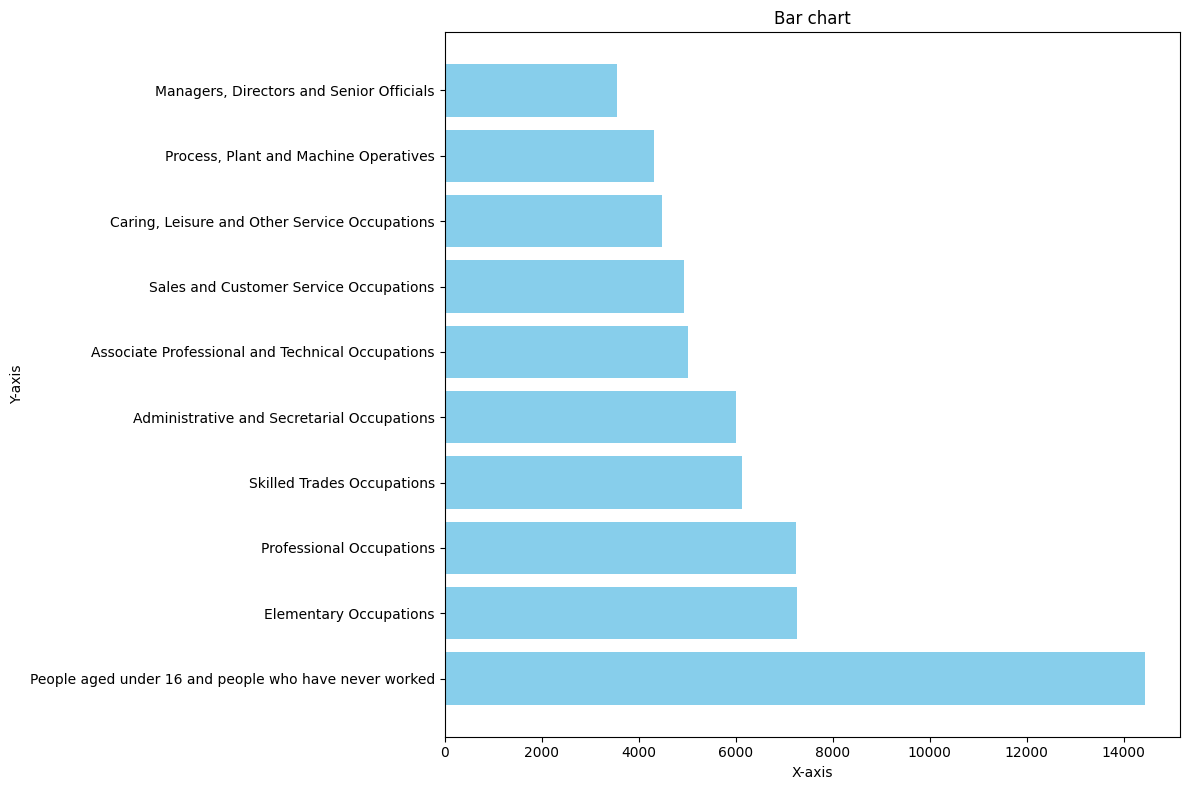

In [18]:
get_widge(results_df_5, x_col='occupation', y_col = 'count')

**the age count**

interactive(children=(Dropdown(description='Chart Type:', options=('bar', 'pie'), value='bar'), Dropdown(descr…

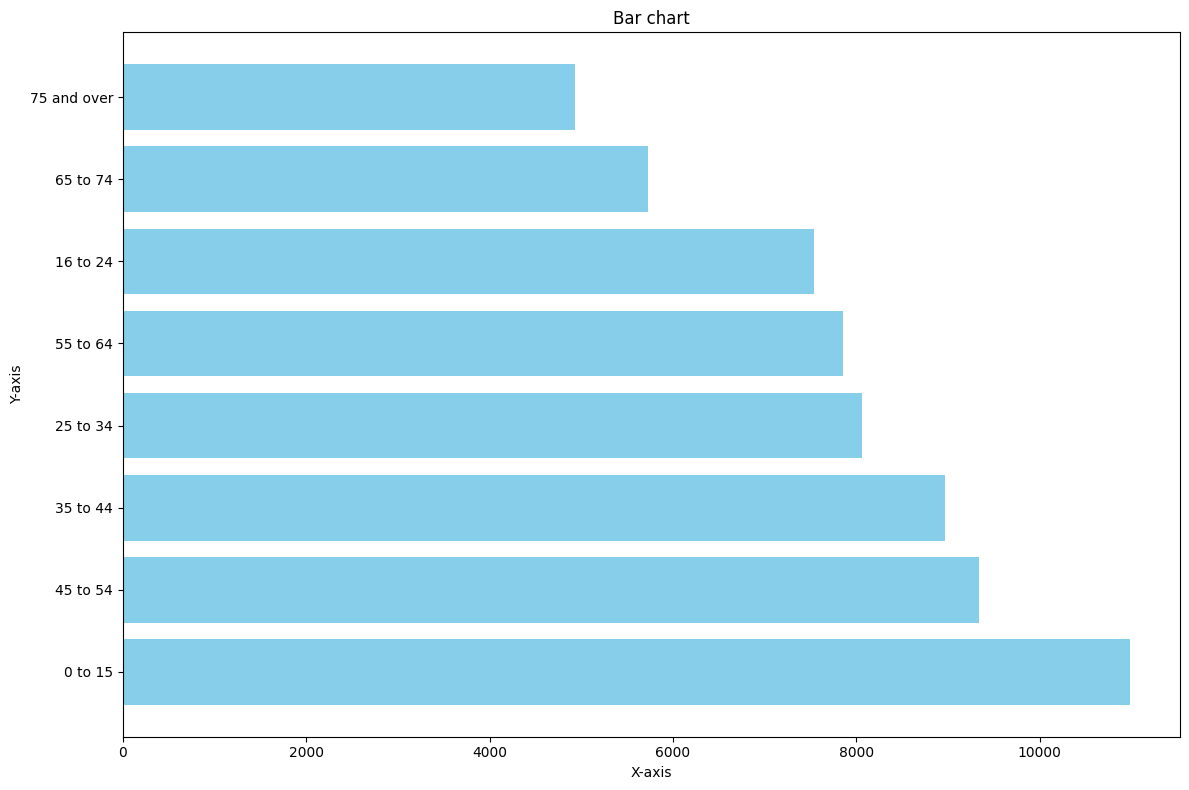

In [19]:
get_widge(results_df_4, x_col='age', y_col = 'count')

**Health distribution**

interactive(children=(Dropdown(description='Chart Type:', index=1, options=('bar', 'pie'), value='pie'), Dropd…

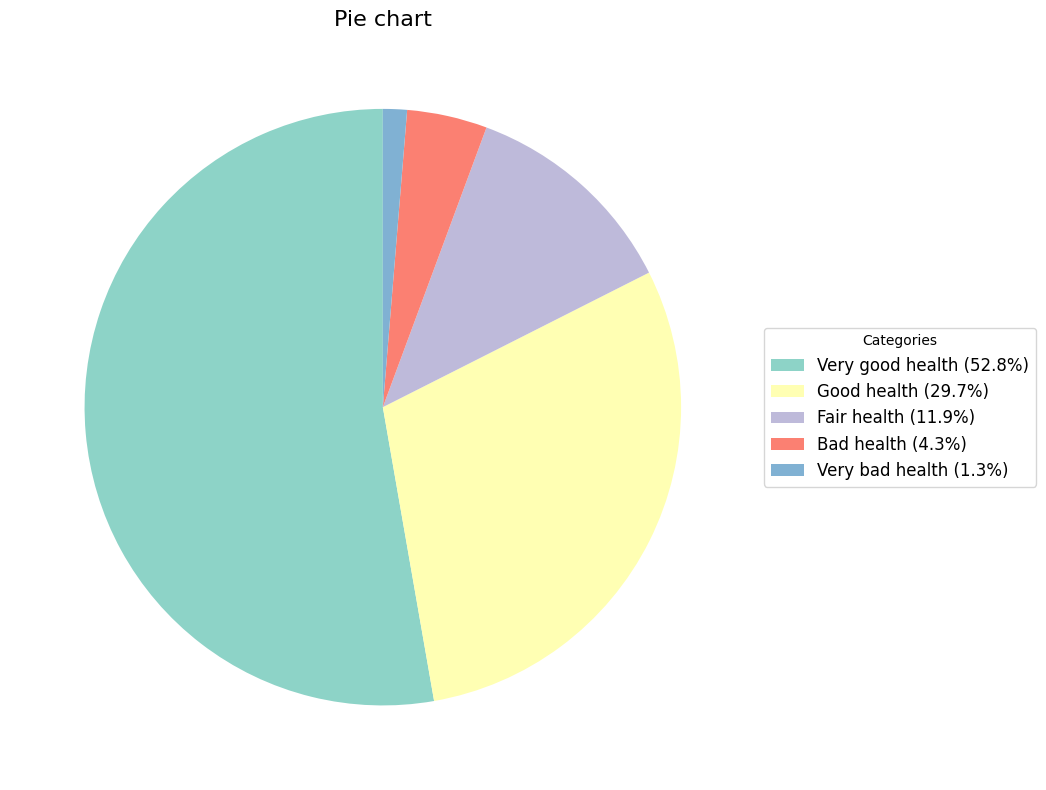

In [20]:
get_widge(resutlts_df_6, x_col='health descriptor', y_col = 'percentage', char_type='pie')

**Ethnicity distribution**

interactive(children=(Dropdown(description='Chart Type:', index=1, options=('bar', 'pie'), value='pie'), Dropd…

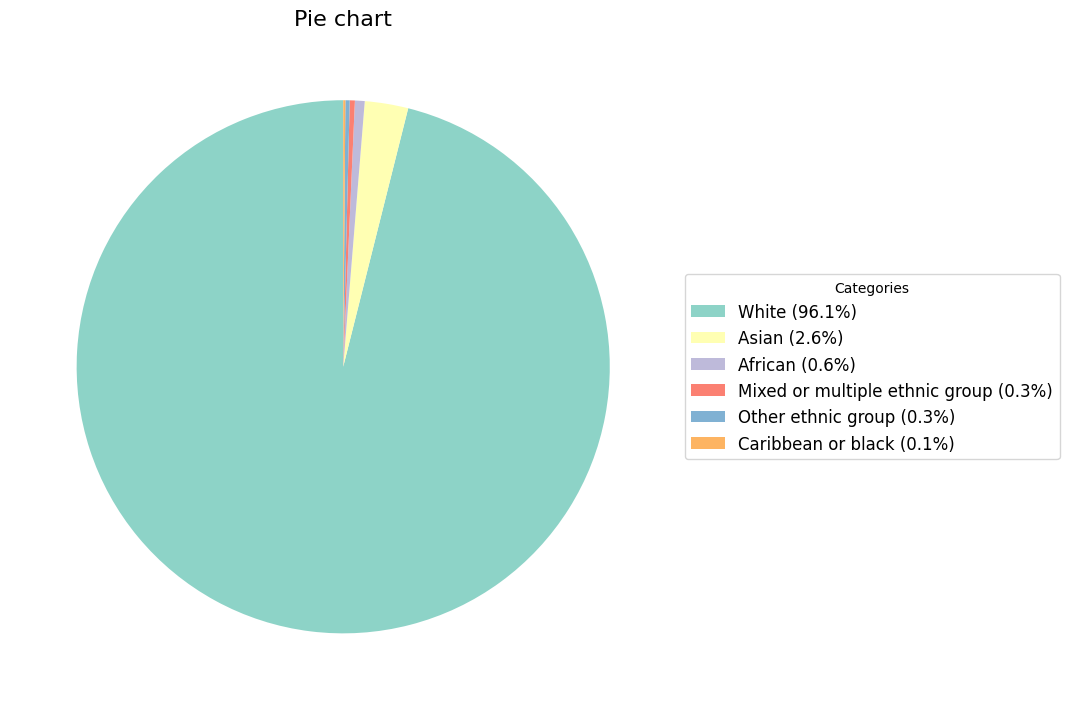

In [21]:
get_widge(resutlts_df_7, x_col='ethinicity', y_col = 'percentage', char_type='pie')